# Class 6 homework - More on different plots for different data

This homework continues the ideas that:

1. We can generate statistically random data from known distributions.
2. Different kinds of plots work best for different kinds of data.

We will generate data from different distributions, including with different structure and correlations. We will make informative plots of them.



## Load modules

The random number generators that we will use are in the numpy (numerical Python) module, so we need to load that along with pandas and seaborn.

Enter the import statements that you need below. These should be familiar by now, class 6.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Different distributions of pseudorandom numbers

The numpy pseudo random number generator supplies different methods to generate different distributions, including:

- uniformly distributed between 0 and 1, `random`, that we used in class 6.
- normal distribution, `normal`, that is ...
- exponential distribution, `exponential`, that is ...
- Poisson distribution, `poisson`, that is ...
- and many more

These are used in a similar way to `.random`

In [2]:
# set up a random number generator
rng_seed1 = np.random.default_rng(seed=1)
# use it to generate a random number
rng_seed1.random()

0.5118216247002567

In [85]:
rng_seed1.normal()
# generate both positie and negative values

0.8762421961143501

In [92]:
rng_seed1.exponential()
# no negative values

0.3735640992225149

In [47]:
rng_seed1.poisson()
# notice if run many times, only n=0,1,2 appear

3

In [6]:
# set up a random number generator
rng_seed2025 = np.random.default_rng(seed=2025)

# generate a data frame with 10 random numbers of each
df_random10 = pd.DataFrame(
    {"unif" : rng_seed2025.random(size = 10), 
     "norm" : rng_seed2025.normal(size = 10),
     "expo" : rng_seed2025.exponential(size = 10),
     "pois" : rng_seed2025.poisson(size = 10)
    })

# generate a data frame with 1000 random numbers of each
df_random1000 = pd.DataFrame(
    {"unif" : rng_seed2025.random(size = 1000), 
     "norm" : rng_seed2025.normal(size = 1000),
     "expo" : rng_seed2025.exponential(size = 1000),
     "pois" : rng_seed2025.poisson(size = 1000)
    })

In [7]:
df_random10.describe()

,unif,norm,expo,pois
count,10.000000,10.000000,10.000000,10.000000
mean,0.629261,0.238716,1.272188,2.000000
std,0.333895,1.270001,0.974058,1.414214
min,0.077225,-1.651581,0.054520,0.000000
25%,0.333595,-0.596581,0.599239,1.000000
50%,0.751509,0.160932,1.158382,2.000000
75%,0.898980,0.643831,1.715657,2.750000
max,0.994458,2.936011,3.381013,5.000000


*Reminder: The statistics from small samples may not be the same as from the larger samples... averages are only on average.*

Try now plotting some of these using the 1-d distribution plots from Class 6:

- histplot
- kdeplot
- ecdfplot

<Axes: ylabel='Count'>

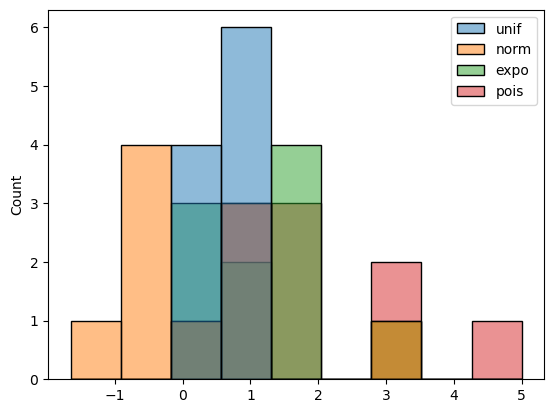

In [8]:
sns.histplot(data=df_random10)

<Axes: ylabel='Count'>

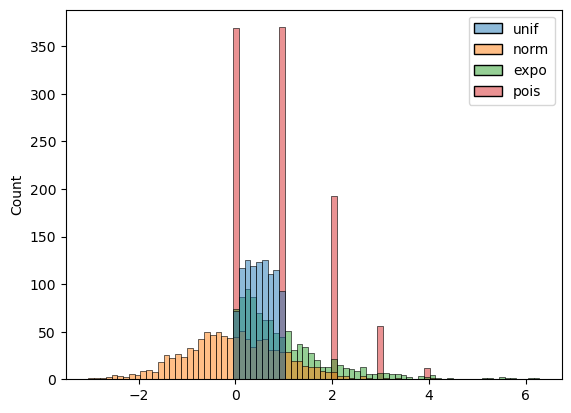

In [9]:
sns.histplot(data=df_random1000)

<Axes: ylabel='Density'>

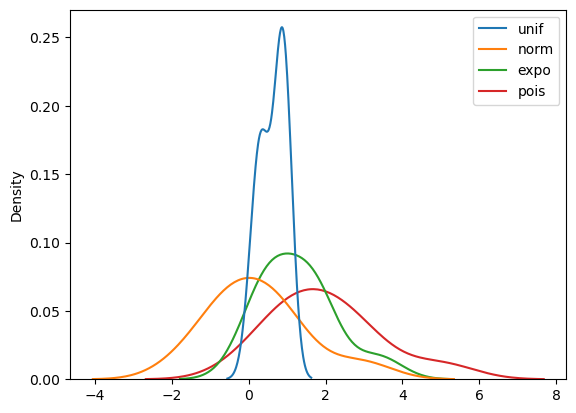

In [10]:
sns.kdeplot(data=df_random10)

<Axes: ylabel='Density'>

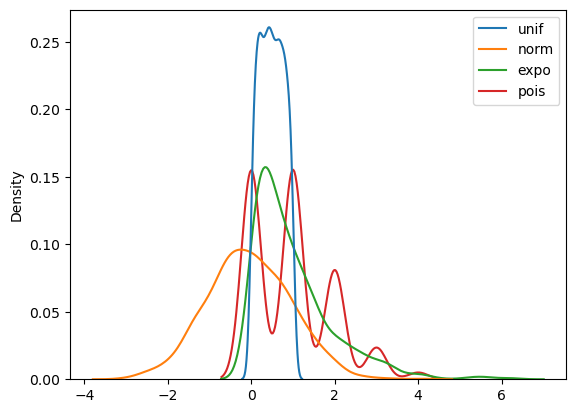

In [11]:
sns.kdeplot(data=df_random1000)

<Axes: ylabel='Proportion'>

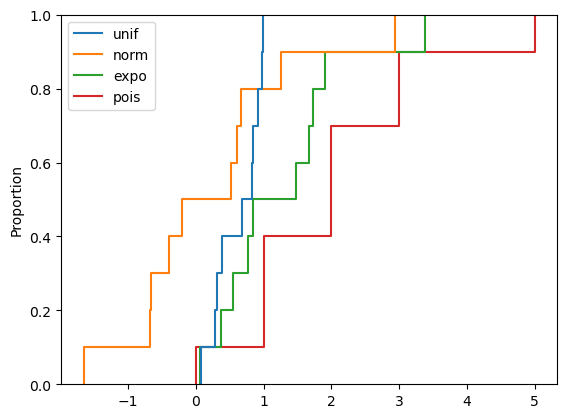

In [12]:
sns.ecdfplot(data=df_random10)

<Axes: ylabel='Proportion'>

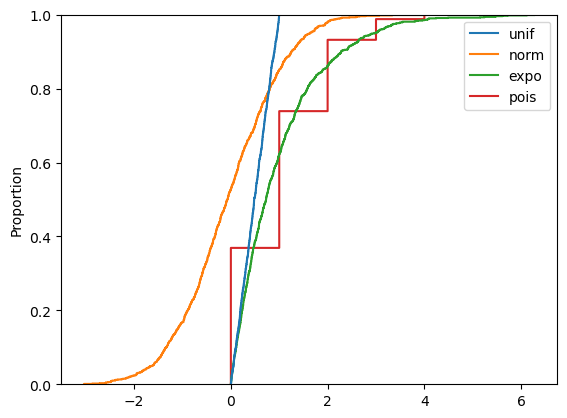

In [13]:
sns.ecdfplot(data=df_random1000)

## The pairplot as a way to make rapid comparisons

The pairplot of a data frame allows quick inspection of distributions and correlations. By plotting these next to each other, pairplots can make differences and similarities clearer.

By default, the pairplot has the 1-d distribution (e.g. histogram) on the diagonal, and scatterplots off the diagonal.

Try making pairplots of the small dataset and the large dataset.

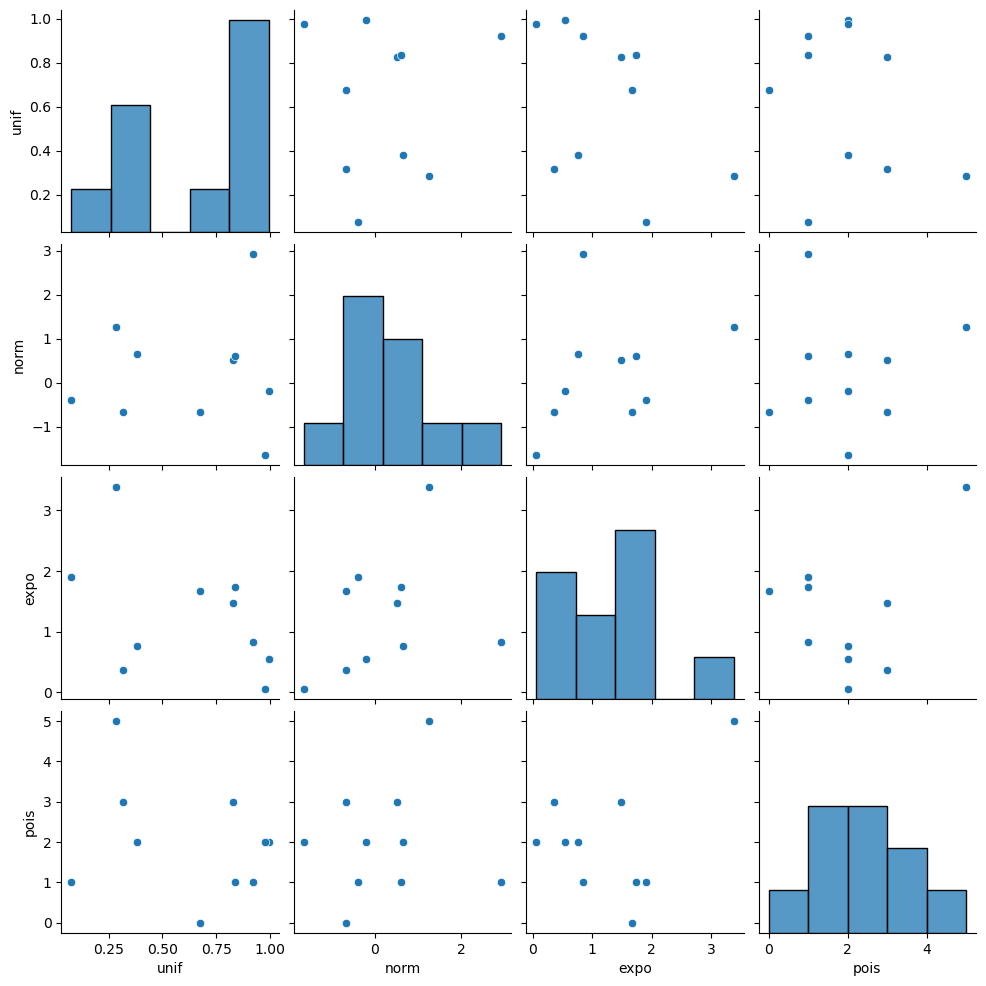

In [14]:
sns.pairplot(data=df_random10)

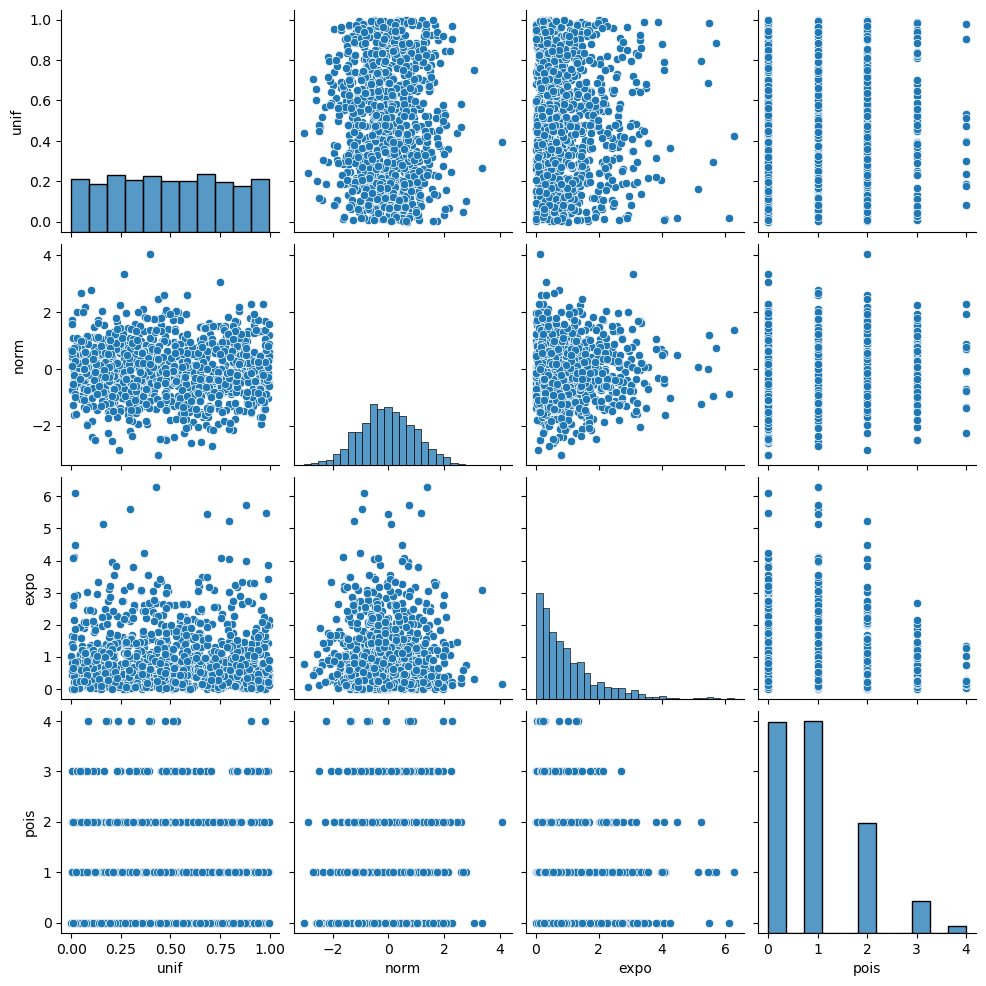

In [15]:
sns.pairplot(data=df_random1000)

The structure of the distributions is hard to see from a sample of 10 points, but much easier with a sample of 1000.

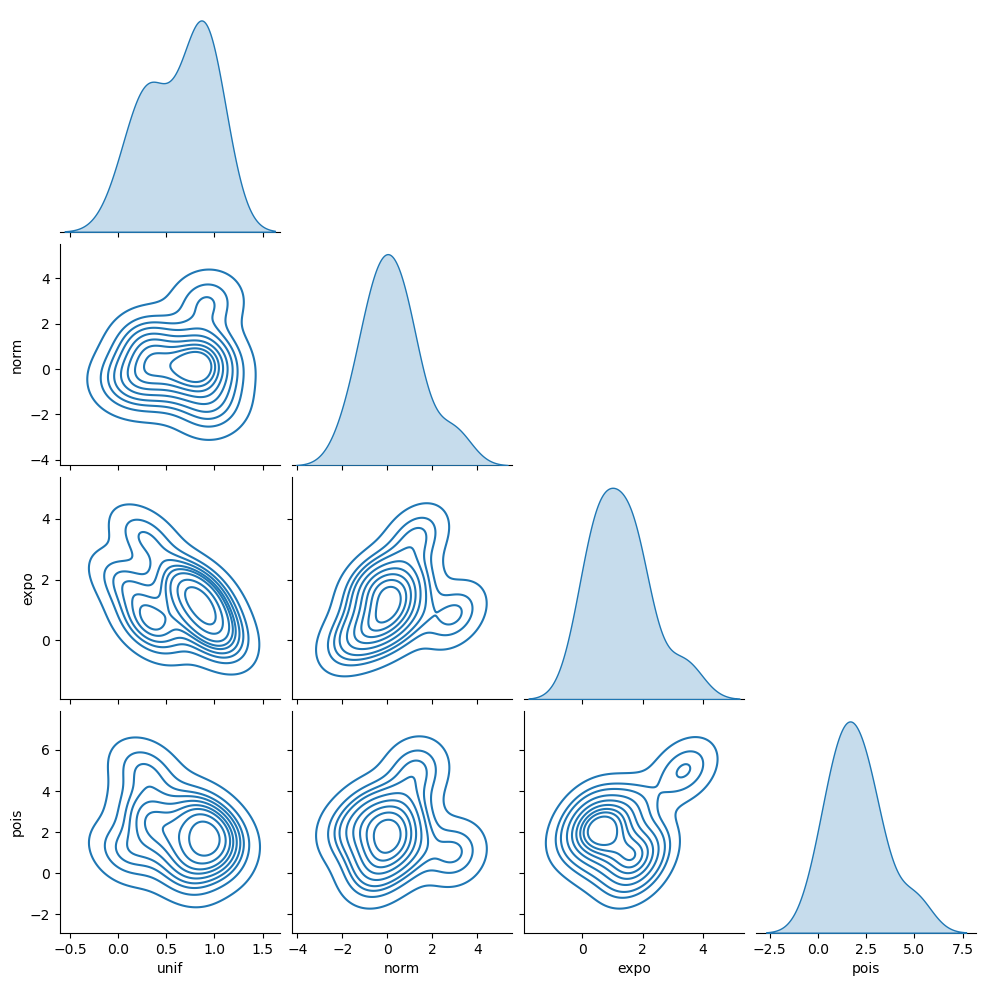

In [16]:
sns.pairplot(data=df_random10, kind='kde', corner=True)

## Generating correlated data

Next, we will generate some data with known correlations and see how that leads to patterns in plotting.

We will do this by first generating some deterministic and some random numbers, then creating new columns based on combining them.

In [17]:
# reseed random number generator with a different seed
rng_seed329 = np.random.default_rng(seed=329)

# generate a data frame with 10 random numbers of each
df_correlated100 = pd.DataFrame(
    {"a" : rng_seed329.random(size = 100),
     "b" : rng_seed329.normal(size = 100),
     "c" : rng_seed329.normal(size = 100)
    })

df_correlated100["a_plus_b"] = df_correlated100["a"] + df_correlated100["b"] 
df_correlated100["a5x_plus_c"] = 5 * df_correlated100["a"] + df_correlated100["c"] 
df_correlated100["b_minus_c"] = df_correlated100["b"] - df_correlated100["c"] 



In [93]:
df_correlated100["a_plus_b"].head()

0   -0.449490
1    0.883820
2    1.164123
3    0.008151
4    1.031346
Name: a_plus_b, dtype: float64

In [19]:
df_correlated100.describe()

,a,b,c,a_plus_b,a5x_plus_c,b_minus_c
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.502911,0.013560,-0.094800,0.516471,2.419757,0.108360
std,0.280930,1.020794,0.985532,1.042242,1.807229,1.394118
min,0.040363,-2.867414,-3.089129,-2.170894,-2.595314,-3.647019
25%,0.256979,-0.660871,-0.673237,-0.130724,0.963218,-0.926917
50%,0.488036,0.059927,-0.074985,0.497607,2.487323,0.281633
75%,0.739153,0.749349,0.529649,1.319265,3.754049,0.974690
max,0.988059,2.597206,2.756067,3.187135,7.485045,4.572881


Now, make a pairplot. Be sure to relate the curves that you see on the plot with the numbers in `.describe()`.

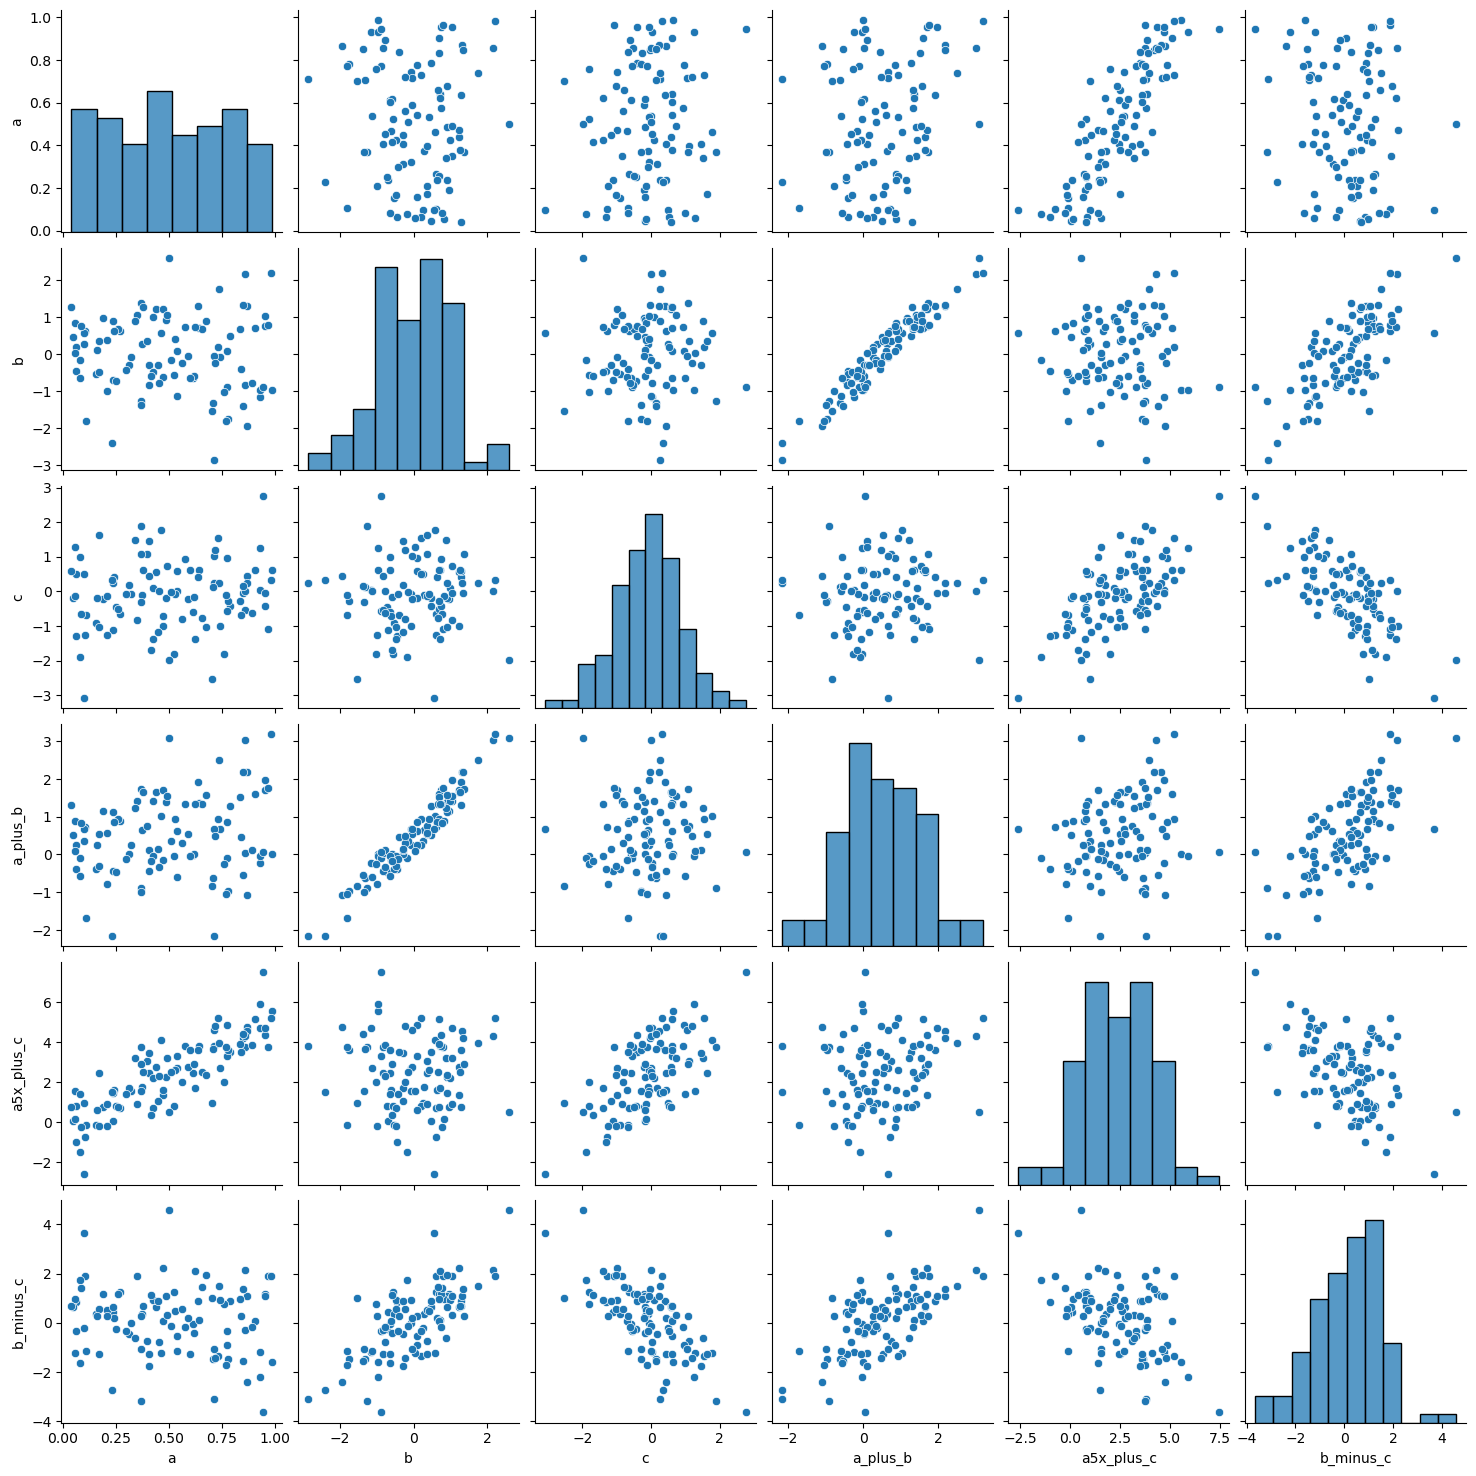

In [20]:
sns.pairplot(data=df_correlated100)

Try redoing the pairplot with `corner = True` and drawing regression lines with `kind = "reg"`.

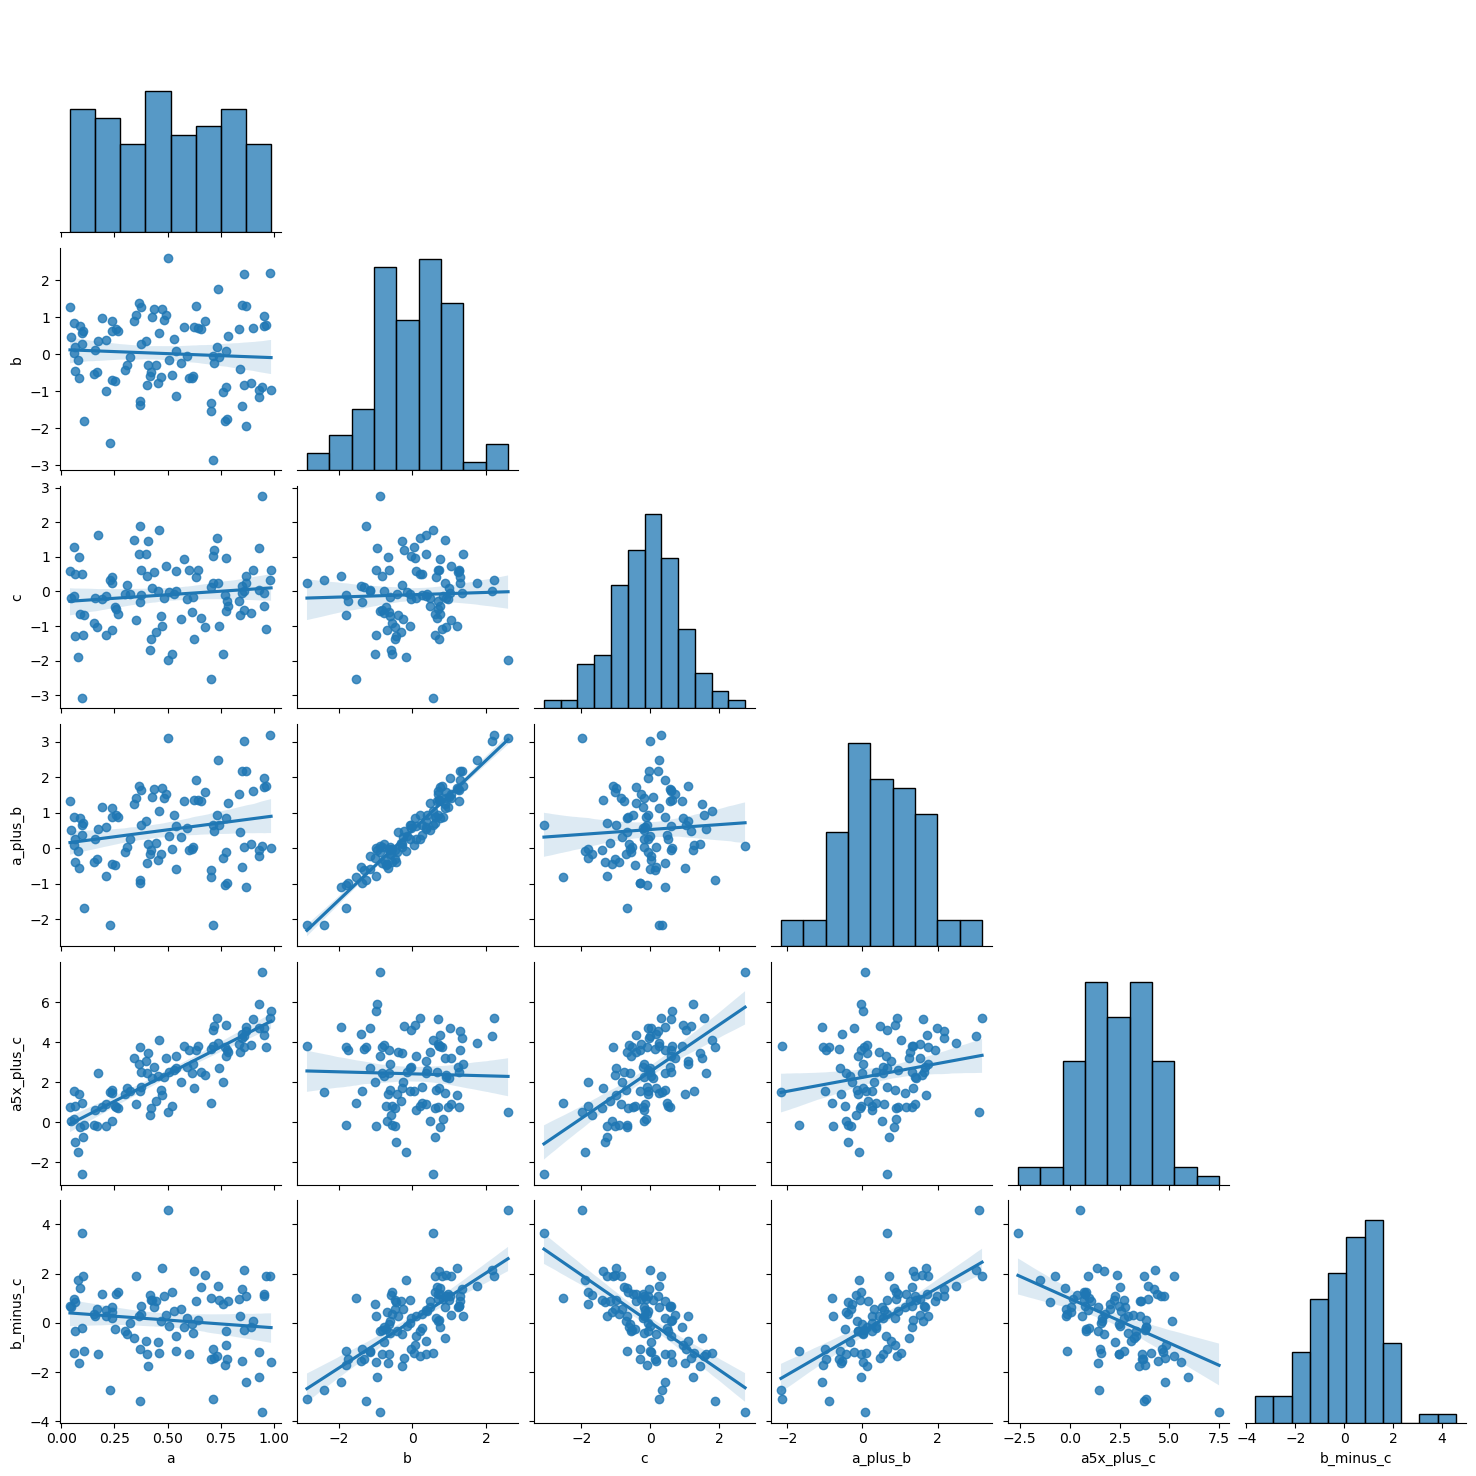

In [21]:
sns.pairplot(data=df_correlated100, corner=True, kind='reg')

To interpret this plot, consider one panel at a time.

The panels on the diagonal are 1-d distributions, here histograms, of each variable individually.

- a is uniformly distributed
- b and c are normally distributed
- distributions of other variables reflect how they were created as sums of columns

Off the diagonal, the variables are scatter plots with linear regression.

- a vs b is not correlated, because they're independent
- a_plus_b is weakly positively correlated to a, because it was created from adding a to b
- a_plus_b is strongly correlated with b,
- **Keep going for all the panels**



It can be overwhelming to focus on only one plot from a big set like this. It makes sense to pick the most interesting from the pair plot and plot them again.

Try that with a lmplot of just a5x_plus_c against a.

*Tip: this plot shows the kind of data that linear regression is most suitable for - here a5x_plus_c is a variable that strongly depends on a, but has added variability with a normal distribution.*



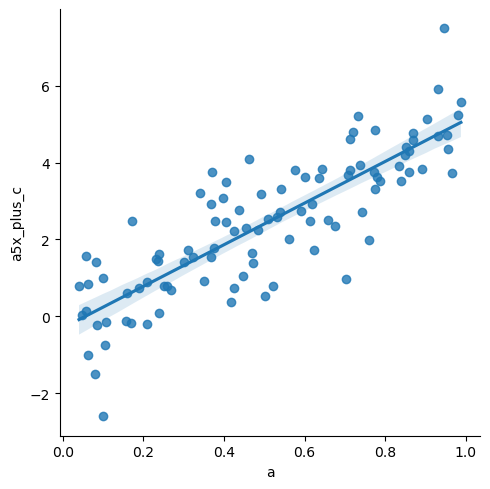

In [22]:
sns.lmplot(x='a',y='a5x_plus_c',data=df_correlated100)

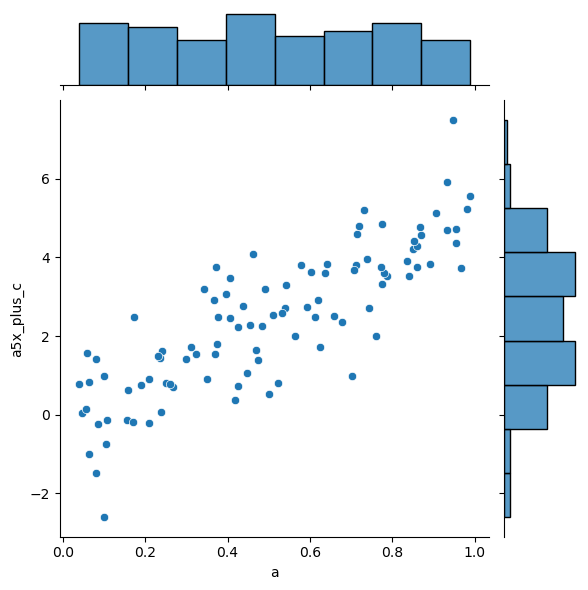

In [23]:
sns.jointplot(x='a',y='a5x_plus_c',data=df_correlated100)

Try a 2d distribution plot as a kernel density estimate (`kde`). This shows how 2-d kernel density estimates highlight correlations between variables.


<Axes: xlabel='a', ylabel='a5x_plus_c'>

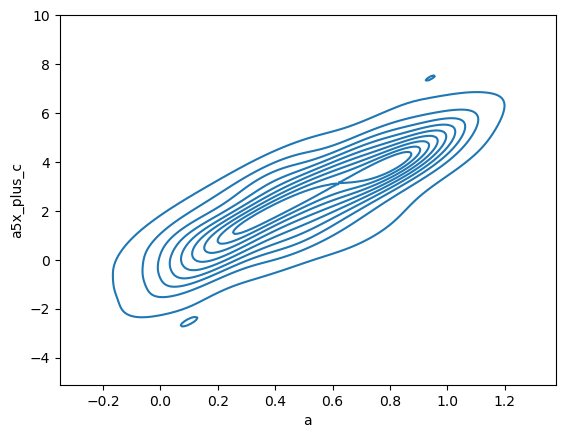

In [24]:
sns.kdeplot(x='a',y='a5x_plus_c',data=df_correlated100)

Lastly, try the pairplot as kernel density estimate (`kind = "kde"`).

Again, systematically think through the panels to understand what the plot might be showing you about the data distribution.

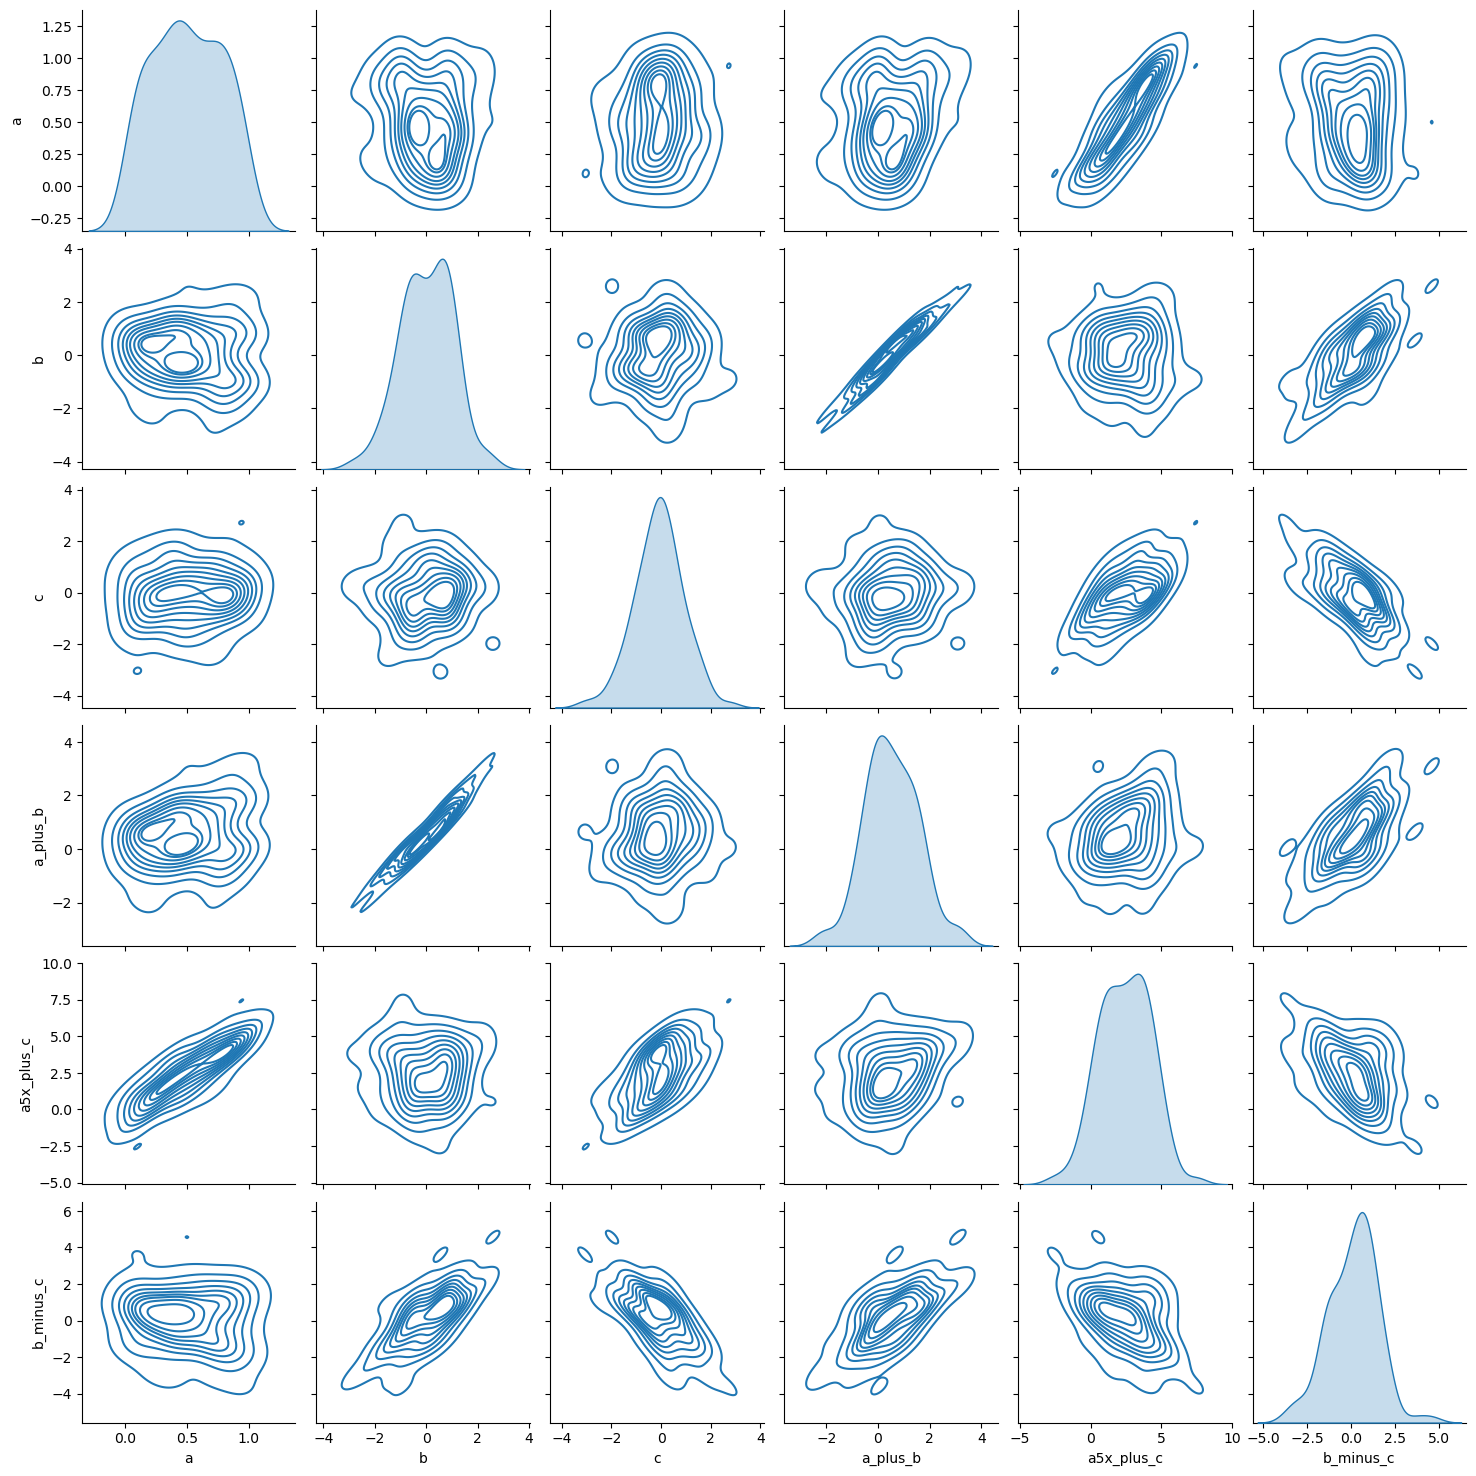

In [25]:
sns.pairplot(data=df_correlated100, kind='kde')